<a href="https://colab.research.google.com/github/JHBaek0306/ImageProcess/blob/main/Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


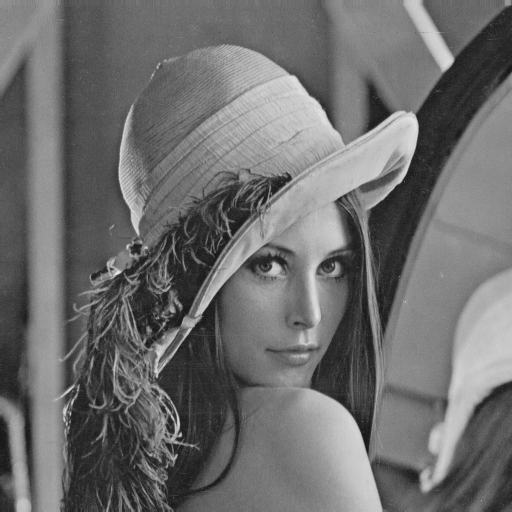

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
images = '/content/drive/MyDrive/Developement/Image/lena_grey.bmp'

img = cv2.imread(images, cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

# Without OpenCV

(256,)


<BarContainer object of 256 artists>

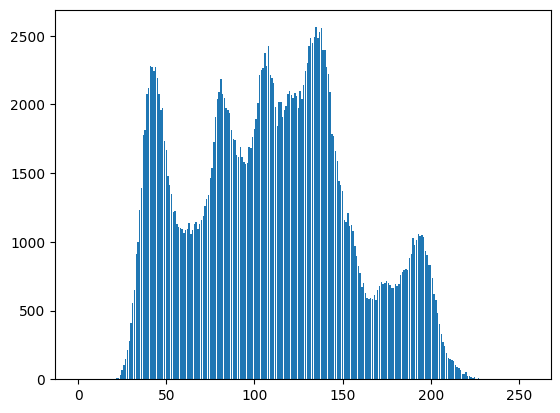

In [107]:
# initialize histogram array filled with 0
histo = np.zeros(shape=(256,), dtype=np.int64)

# get image's height and weight
h, w = img.shape

# Increase the corresponding histogram column by 1
for i in range(h):
    for j in range (w):
        histo[img[j, i]] = histo[img[j, i]] + 1

# Plot in bar
bins = np.arange(0, 256, 1)
plt.bar(bins, histo)

# OpenCV

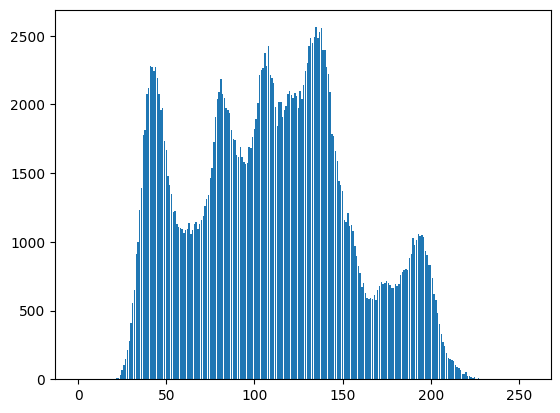

In [111]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.bar(bins, hist.ravel())
plt.show()